# Area 51 to try out code

In [17]:
import socket as socket
import os as os
import sys as sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd())

sys.path.append("./python3/") 
from main import HMM_Full
from plot.plot_posterior import plot_posterior, plot_posterior_panel

compute-a-16-165.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK


### The classic example:
Should be LL -26156.062 with params XX

In [4]:
%%time
h = HMM_Full(folder_in="./output/simulated/undermodel/sim2a/", l_model="simulated", t_model="standard", 
                 e_model="haploid_gl", h_model = "FiveStateFast", p_model="None",
                 output=True, load=True)
h.t_obj.set_params(ibd_in = 0.0001, ibd_out = 0.001, ibd_jump = 0.001)
post, r_vec, fwd, bwd, tot_ll = h.run_fwd_bwd()

Minimum Genetic Map: 1.0000 Morgan
Maximum Genetic Map: 1.0000 Morgan
Gaps bigger than 0.1 cM: 0
Maximum Gap: 0.0000 cM
Upper Gap Cutoff: 5.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 101.511168 mB
Total Log likelihood: -26127.770
CPU times: user 149 ms, sys: 7.31 ms, total: 156 ms
Wall time: 156 ms


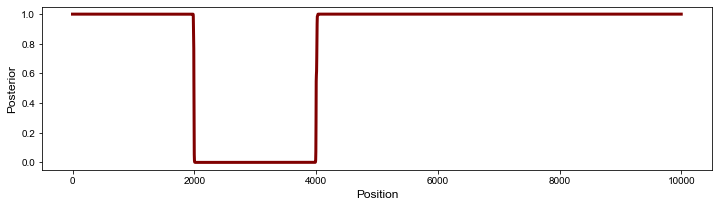

In [5]:
plot_posterior(post=post, state=0, fs_l=12, show=True)

Saved to ./figs/dumpster/5state_simulated.png


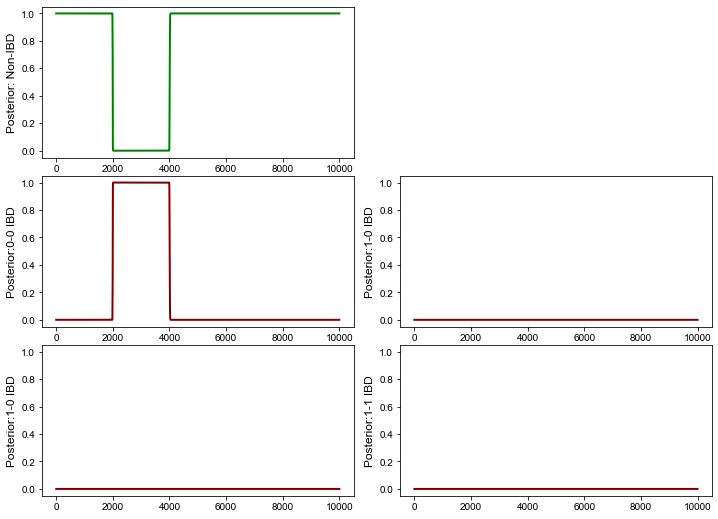

In [6]:
plot_posterior_panel(post=post, savepath="./figs/dumpster/5state_simulated.png", lw=2)

Saved to ./figs/dumpster/5state_simulated_zoom.png


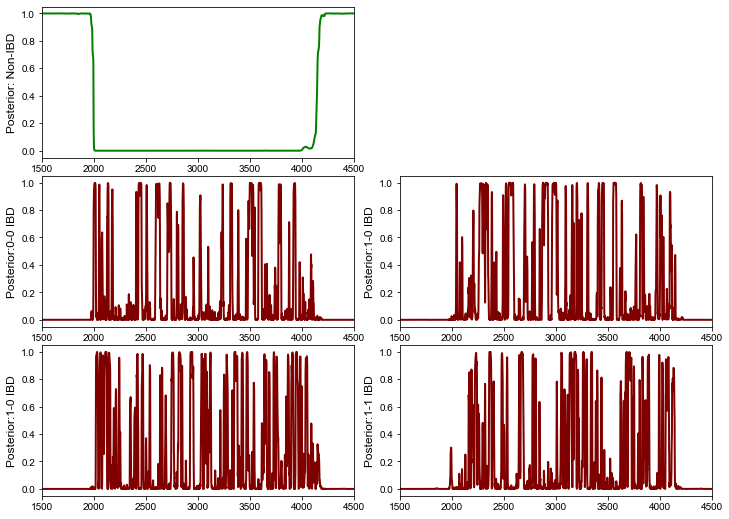

In [27]:
plot_posterior_panel(post=post, 
                     savepath="./figs/dumpster/5state_simulated_zoom.png", xlim=[1500,4500], lw=2)

# Run full hdf5 example

In [31]:
%%time
h = HMM_Full(folder_in="./data/hdf5/1240k_v43/ch", l_model="hdf5", t_model="standard", 
                 e_model="haploid_gl", h_model = "FiveStateFast", p_model="hapROH",
                 output=True, load=True)
h.t_obj.set_params(ibd_in = 1, ibd_out = 1, ibd_jump = 500)
h.l_obj.set_params(iids=["SUC002", "SUC005"], ch=6)
h.p_obj.set_params(iid="SUC002_SUC005", ch=6, folder="./output/empirical/test/SUC002_SUC005/", save=2, ibd_min_l=0.02)
post, r_vec, fwd, bwd, tot_ll = h.run_fwd_bwd()

Minimum Genetic Map: 0.0032 Morgan
Maximum Genetic Map: 1.9203 Morgan
Gaps bigger than 0.1 cM: 151
Maximum Gap: 0.5062 cM
Upper Gap Cutoff: 5.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 208.949248 mB
Total Log likelihood: -179983.665
Fraction Markers above IBD cutoff: 0.7839
Merged n=2 gaps < 0.01 M
Called n=12 IBD Blocks > 2.0 cM
Longest Block: 5.78 cM
Successfully saved output to ./output/empirical/test/SUC002_SUC005/
CPU times: user 922 ms, sys: 28.8 ms, total: 950 ms
Wall time: 1.17 s


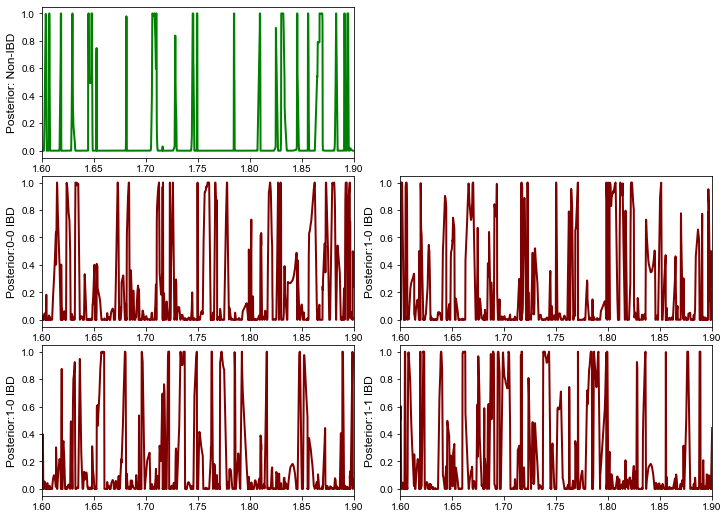

In [26]:
plot_posterior_panel(post=post, savepath="", ch=6, xlim=[1.6,1.9],
                     lw=2)

In [32]:
df = pd.read_csv("./output/empirical/test/SUC002_SUC005/ibd.tsv", sep="\t")

In [33]:
df

,Start,End,StartM,EndM,length,lengthM,iid,ch
0,1846,2429,0.085647,0.110237,583,0.024590,SUC002_SUC005,6
1,3263,3706,0.138453,0.159457,443,0.021004,SUC002_SUC005,6
2,7623,8470,0.289627,0.316992,847,0.027365,SUC002_SUC005,6
3,10309,11274,0.364692,0.394488,965,0.029796,SUC002_SUC005,6
4,41382,42385,0.949557,0.975956,1003,0.026399,SUC002_SUC005,6
5,45590,46458,1.052080,1.074047,868,0.021967,SUC002_SUC005,6
6,53605,54712,1.234573,1.271348,1107,0.036775,SUC002_SUC005,6
7,55018,56333,1.285010,1.310192,1315,0.025182,SUC002_SUC005,6
8,60444,60981,1.428124,1.451975,537,0.023851,SUC002_SUC005,6
9,65033,65861,1.545622,1.575142,828,0.029520,SUC002_SUC005,6


### Test total likelihoods

In [ ]:
%%time
jrts = np.logspace(2, 3, num=20)

h = HMM_Full(folder_in="./data/hdf5/1240k_v43/ch", l_model="hdf5", t_model="standard", 
                 e_model="haploid_gl", h_model = "FiveStateFast",
                 output=False, load=True)
lls = np.zeros(len(jrts),dtype="float")

for i,jrt in enumerate(jrts):
    h.t_obj.set_params(ibd_in = 1, ibd_out = 10, ibd_jump = jrt)
    h.l_obj.set_params(iids=["SUC002", "SUC003"], ch=4)
    _, _, _, tot_ll = h.run_fwd_bwd()
    lls[i] = tot_ll

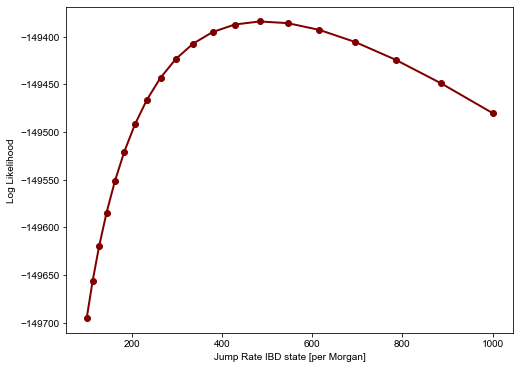

In [127]:
plt.figure(figsize=(8,6))
ax=plt.gca()
ax.plot(jrts, lls,"o-", color="maroon", lw=2)
ax.set_xscale("linear")
ax.set_xlabel("Jump Rate IBD state [per Morgan]")
ax.set_ylabel("Log Likelihood")
plt.show()

In [121]:
i=np.argmax(lls)
jrts[i]

483.2930238571752

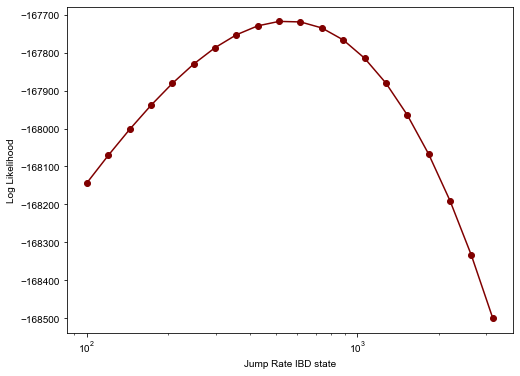

In [112]:
plt.figure(figsize=(8,6))
ax=plt.gca()
ax.plot(jrts,lls,"o-", color="maroon")
ax.set_xscale("log")
ax.set_xlabel("Jump Rate IBD state")
ax.set_ylabel("Log Likelihood")
plt.show()

In [117]:
i=np.argmax(lls)
jrts[i]

2636.650898730358